## Sanity Check for meta.csv vs wav files

In [ ]:
import os
import pandas as pd

def check_files_in_directory(csv_file, directory):
    # Step 1: Read the CSV file
    df = pd.read_csv(csv_file, delimiter='\t')
    print(df)
    # Step 2: List files in the directory
    files_in_directory = os.listdir(directory)
    
    # Step 3: Compare file names
    missing_files = []
    for file_name in df['filename']:
        file_name = os.path.basename(file_name)  # Extract filename from path
        if file_name not in files_in_directory:
            missing_files.append(file_name)
    
    # Step 4: Report results
    if len(missing_files) == 0:
        print("All files described in the CSV are present in the directory.")
    else:
        print("The following files are missing from the directory:")
        for missing_file in missing_files:
            print(missing_file)

# Example usage:
csv_file = "D:\Sean\DCASE\datasets\Extract_to_Folder\TAU-urban-acoustic-scenes-2022-mobile-development\meta.csv"
directory = "D:\Sean\DCASE\datasets\Extract_to_Folder\TAU-urban-acoustic-scenes-2022-mobile-development\\audio"
check_files_in_directory(csv_file, directory)


## Checking Logit values

In [4]:
import torch

# Specify the path to the logits file
logits_file_path = "D:\Sean\github\dcase2024_task1\predictions\904bkzkq\logits.pt"

# Load the tensors from the file
logits = torch.load(logits_file_path)

# Now you can inspect the loaded logits
print(logits)


c:\Users\eeeds\anaconda3\envs\dcase2024\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[11.4531, -5.4258, -3.4219,  ...,  3.7383, -9.1797, -4.6953],
        [ 7.7656, -2.4453, -1.4922,  ..., -1.6553, -5.6523, -2.7441],
        [ 9.1953, -4.3438, -2.1680,  ...,  2.9082, -6.1914, -4.6367],
        ...,
        [-3.4199,  0.4106, -0.6025,  ..., -0.5483,  0.6006,  3.3672],
        [-3.1270, -0.2114, -2.3418,  ..., -0.0861, -1.2314,  5.2344],
        [-0.7363, -3.0469, -2.0430,  ...,  1.4385, -4.3555,  6.5938]],
       dtype=torch.float16)


## WANDB API Get Run data

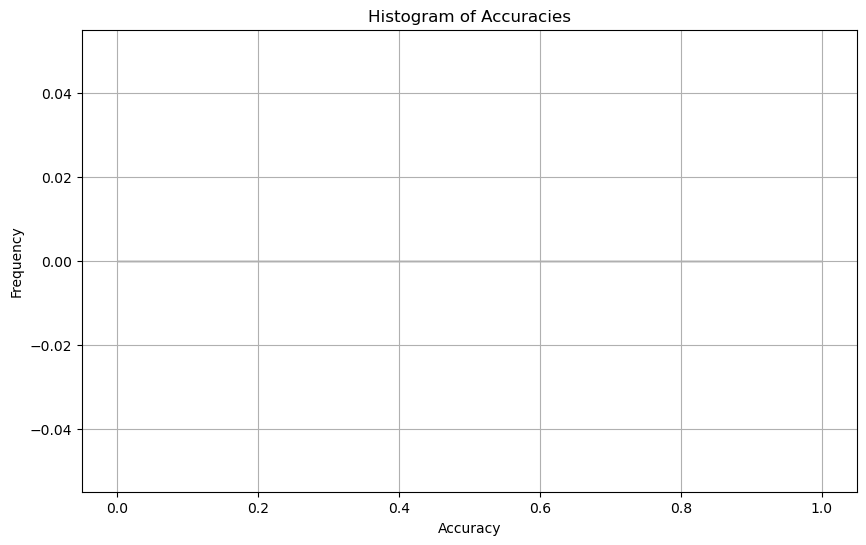

56

In [8]:
import pandas as pd
import wandb
import matplotlib.pyplot as plt

# Initialize wandb API
api = wandb.Api()

# Define entity and project
entity, project = "seanyeo300", "DCASE24_Task1"

# Get runs
runs = api.runs(entity + "/" + project)

# Initialize lists to store data
summary_list, config_list, name_list = [], [], []

# Loop through runs and collect summary, config, and name data
for run in runs:
    summary_list.append(run.summary._json_dict)
    config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})
    name_list.append(run.name)

# Create DataFrame
runs_df = pd.DataFrame({"summary": summary_list, "config": config_list, "name": name_list})

# Extract accuracies from summary_list
accuracies = [summary['accuracy'] for summary in summary_list if 'acc' in summary]

# Plot accuracies as histogram
plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Accuracies')
plt.grid(True)
plt.show()
56

## Plotting Manually

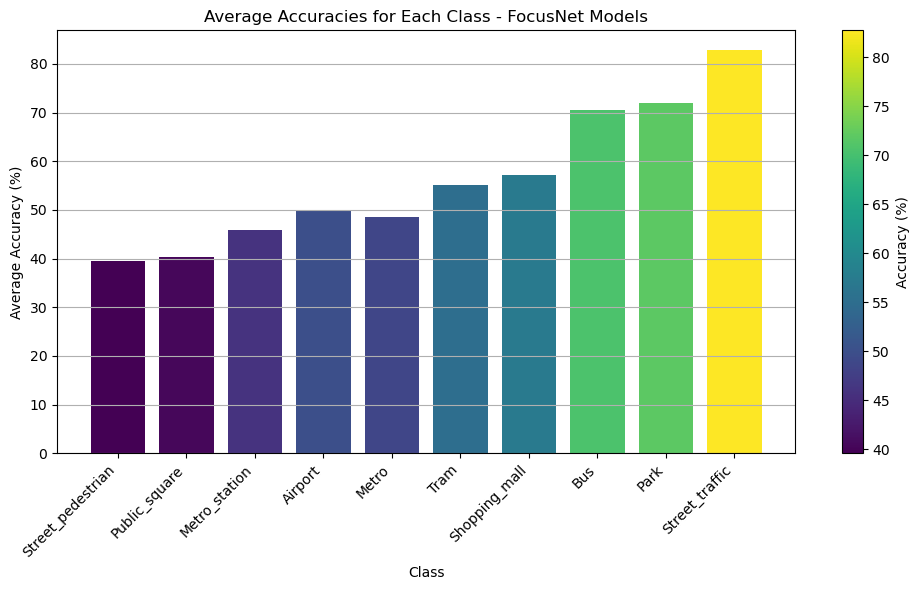

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# FocusNet 1 results
focusnet1 = {
    'Street_pedestrian': 40.10,
    'Public_square': 41.11,
    'Metro_station': 45.56,
    'Airport': 49.12,
    'Metro': 49.90,
    'Tram': 53.82,
    'Shopping_mall': 56.46,
    'Bus': 68.78,
    'Park': 71.95,
    'Street_traffic': 81.88
}

# FocusNet 2 results
focusnet2 = {
    'Street_pedestrian': 39.10,
    'Public_square': 39.46,
    'Metro_station': 46.29,
    'Metro': 47.34,
    'Airport': 50.84,
    'Tram': 56.32,
    'Shopping_mall': 57.81,
    'Park': 71.95,
    'Bus': 72.29,
    'Street_traffic': 83.60
}

# Average accuracies for each class
classes = list(focusnet1.keys())
avg_accuracies = [(focusnet1[class_] + focusnet2[class_]) / 2 for class_ in classes]

# Calculate color intensity based on average accuracies
color_map = plt.cm.viridis
norm = Normalize(vmin=min(avg_accuracies), vmax=max(avg_accuracies))
color_intensities = [norm(accuracy) for accuracy in avg_accuracies]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(classes, avg_accuracies, color=color_map(color_intensities))
plt.xlabel('Class')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracies for Each Class - FocusNet Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add color bar for reference
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), ax=plt.gca())
cbar.set_label('Accuracy (%)')

plt.tight_layout()
plt.show()


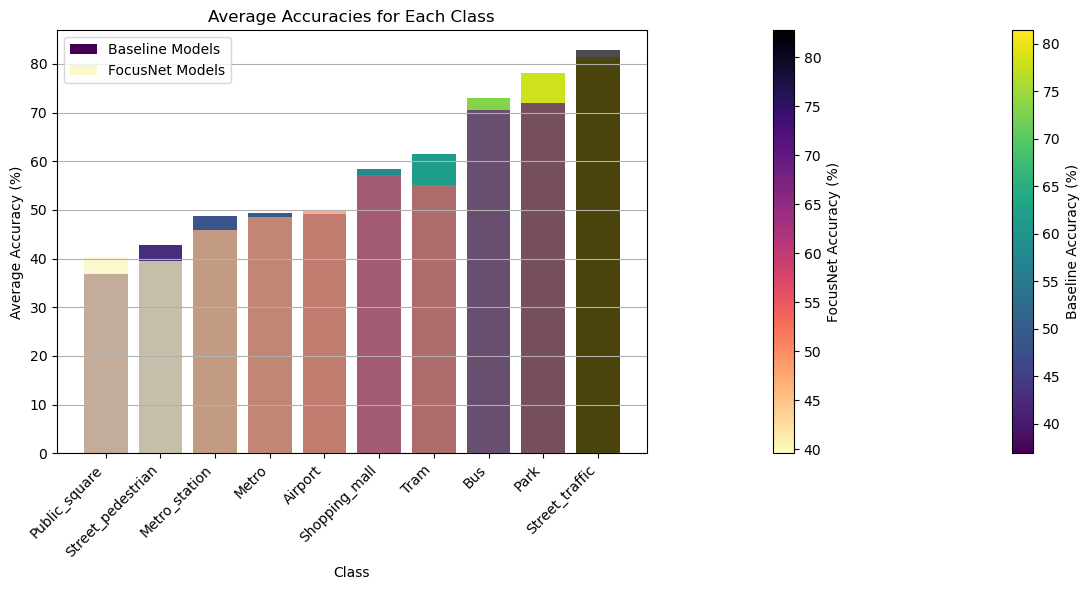

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Baseline 1 results
baseline1 = {
    'Public_square': 40.06,
    'Street_pedestrian': 41.44,
    'Metro_station': 45.56,
    'Metro': 48.79,
    'Airport': 51.75,
    'Shopping_mall': 58.38,
    'Tram': 58.01,
    'Bus': 74.07,
    'Park': 78.58,
    'Street_traffic': 81.61
}

# Baseline 2 results
baseline2 = {
    'Public_square': 33.74,
    'Street_pedestrian': 44.14,
    'Airport': 46.59,
    'Metro': 49.73,
    'Metro_station': 51.82,
    'Shopping_mall': 58.45,
    'Tram': 65.07,
    'Bus': 72.09,
    'Park': 77.54,
    'Street_traffic': 81.18
}

# FocusNet 1 results
focusnet1 = {
    'Street_pedestrian': 40.10,
    'Public_square': 41.11,
    'Metro_station': 45.56,
    'Airport': 49.12,
    'Metro': 49.90,
    'Tram': 53.82,
    'Shopping_mall': 56.46,
    'Bus': 68.78,
    'Park': 71.95,
    'Street_traffic': 81.88
}

# FocusNet 2 results
focusnet2 = {
    'Street_pedestrian': 39.10,
    'Public_square': 39.46,
    'Metro_station': 46.29,
    'Metro': 47.34,
    'Airport': 50.84,
    'Tram': 56.32,
    'Shopping_mall': 57.81,
    'Park': 71.95,
    'Bus': 72.29,
    'Street_traffic': 83.60
}

# Average accuracies for each class across Baseline models
avg_baseline_accuracies = [(baseline1[class_] + baseline2[class_]) / 2 for class_ in classes]

# Average accuracies for each class across FocusNet models
avg_focusnet_accuracies = [(focusnet1[class_] + focusnet2[class_]) / 2 for class_ in classes]

# Calculate color intensity based on average accuracies for Baseline models
baseline_color_map = plt.cm.viridis
baseline_norm = Normalize(vmin=min(avg_baseline_accuracies), vmax=max(avg_baseline_accuracies))
baseline_color_intensities = [baseline_norm(accuracy) for accuracy in avg_baseline_accuracies]

# Calculate color intensity based on average accuracies for FocusNet models
focusnet_color_map = plt.cm.magma_r
focusnet_norm = Normalize(vmin=min(avg_focusnet_accuracies), vmax=max(avg_focusnet_accuracies))
focusnet_color_intensities = [focusnet_norm(accuracy) for accuracy in avg_focusnet_accuracies]

# Plotting
plt.figure(figsize=(12, 6))

# Plot Baseline models
plt.bar(classes, avg_baseline_accuracies, color=baseline_color_map(baseline_color_intensities), label='Baseline Models')

# Plot FocusNet models
plt.bar(classes, avg_focusnet_accuracies, color=focusnet_color_map(focusnet_color_intensities), label='FocusNet Models', alpha=0.7)

plt.xlabel('Class')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracies for Each Class')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add color bar for reference
cbar_baseline = plt.colorbar(plt.cm.ScalarMappable(norm=baseline_norm, cmap=baseline_color_map), ax=plt.gca(), pad=0.1)
cbar_baseline.set_label('Baseline Accuracy (%)')

cbar_focusnet = plt.colorbar(plt.cm.ScalarMappable(norm=focusnet_norm, cmap=focusnet_color_map), ax=plt.gca(), pad=0.15)
cbar_focusnet.set_label('FocusNet Accuracy (%)')

plt.legend()
plt.tight_layout()
plt.show()


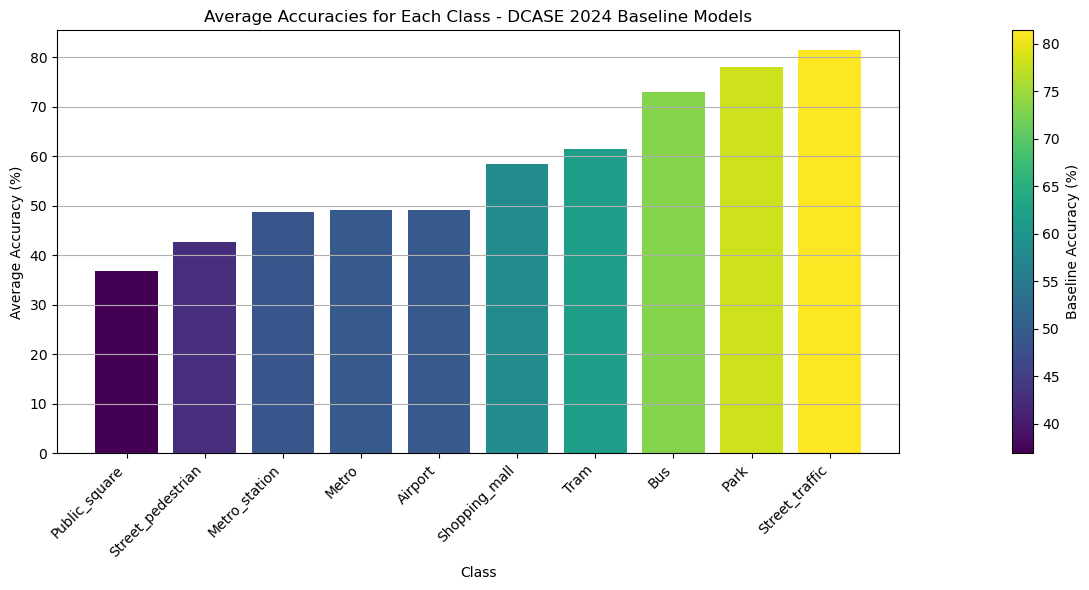

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Baseline 1 results
baseline1 = {
    'Public_square': 40.06,
    'Street_pedestrian': 41.44,
    'Metro_station': 45.56,
    'Metro': 48.79,
    'Airport': 51.75,
    'Shopping_mall': 58.38,
    'Tram': 58.01,
    'Bus': 74.07,
    'Park': 78.58,
    'Street_traffic': 81.61
}

# Baseline 2 results
baseline2 = {
    'Public_square': 33.74,
    'Street_pedestrian': 44.14,
    'Airport': 46.59,
    'Metro': 49.73,
    'Metro_station': 51.82,
    'Shopping_mall': 58.45,
    'Tram': 65.07,
    'Bus': 72.09,
    'Park': 77.54,
    'Street_traffic': 81.18
}

# Average accuracies for each class across Baseline models
avg_baseline_accuracies = [(baseline1[class_] + baseline2[class_]) / 2 for class_ in classes]

# Calculate color intensity based on average accuracies for Baseline models
baseline_color_map = plt.cm.viridis
baseline_norm = Normalize(vmin=min(avg_baseline_accuracies), vmax=max(avg_baseline_accuracies))
baseline_color_intensities = [baseline_norm(accuracy) for accuracy in avg_baseline_accuracies]


# Plotting
plt.figure(figsize=(12, 6))

# Plot Baseline models
plt.bar(classes, avg_baseline_accuracies, color=baseline_color_map(baseline_color_intensities), label='Baseline Models')

plt.xlabel('Class')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracies for Each Class - DCASE 2024 Baseline Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add color bar for reference
cbar_baseline = plt.colorbar(plt.cm.ScalarMappable(norm=baseline_norm, cmap=baseline_color_map), ax=plt.gca(), pad=0.1)
cbar_baseline.set_label('Baseline Accuracy (%)')

plt.tight_layout()
plt.show()
